- Experiments of the real-word data, including iris, wine, hepatitis and breast cancer. you can test each algorithm on each dataset by excuting the corresponding section

In [1]:
from git_cluster import GIT
import hdbscan
from QuickshiftPP import *
from Spectacl import Spectacl
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import numpy as np
from pydpc import Cluster
from pydpc._reference import Cluster as RefCluster
import matplotlib as mpl
from Pipeline import DPA

import sys; sys.path.append('../')
from utils import measures_calculator, matchY, autoPlot
from collections import Counter
from dataloaders import Real_DataLoader as DataLoader

/opt/anaconda3/envs/cluster/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# 1. Real dataset - Iris

In [2]:
X, Y_true = DataLoader(name='iris').load()

## GIT

In [3]:
Y_pred = GIT(k=15, 
             target_ratio=[ 1., 1,1]).fit_predict(X)

Y_pred,Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.876847,0.706006,0.88,0.756087,1.0,3.0


## HDBSCAN

In [4]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, \
                            min_samples=20, gen_min_span_tree=True)
clusterer.fit(X)

Y_pred = clusterer.labels_
Y_pred,Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.571521,0.575946,0.680272,0.737215,0.98,2.0


## QuickshiftPP

In [5]:
X = [X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=10,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred, Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.800757,0.559107,0.78,0.579835,1.0,4.0


## SpecACI

In [6]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=3, epsilon=3).fit_predict(X)
Y_pred, Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.78355,0.563243,0.786667,0.627944,1.0,3.0


## Spectral Clustering

In [7]:
clustering = SpectralClustering(n_clusters=3,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.898775,0.743683,0.9,0.766036,1.0,3.0


## K-Means

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.891775,0.730238,0.893333,0.758176,1.0,3.0


## DPC

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.555556,0.568116,0.666667,0.73368,1.0,2.0


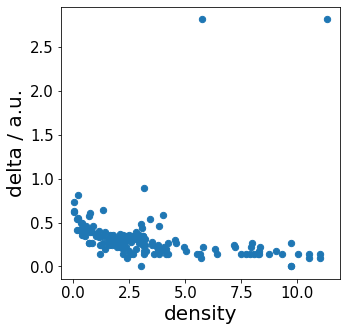

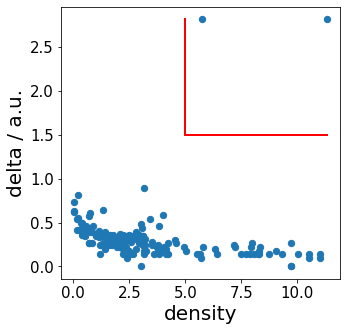

In [9]:
clu = Cluster(np.ascontiguousarray(X))
clu.assign(5, 1.5)
Y_pred = clu.membership

Y_pred,Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

## DPA

In [10]:
dpa = DPA.DensityPeakAdvanced(Z=0.8)
dpa.fit(X)

Y_pred = dpa.halos_
Y_pred,Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.83091,0.573395,0.771429,0.676159,0.233333,4.0


# 2. Real dataset - wine

In [11]:
X, Y_true = DataLoader(name='wine').load()

## GIT

In [12]:
Y_pred = GIT(k=20,
            target_ratio=[ 1., 1, 1]).fit_predict(X)

Y_pred, Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.897018,0.713308,0.898876,0.75702,1.0,3.0


## HDBSCAN

In [13]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=2, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred = clusterer.labels_
Y_pred, Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.543453,0.30342,0.635294,0.420467,0.955056,2.0


## QuickshiftPP

In [14]:
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=20,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.728703,0.394124,0.719101,0.435194,1.0,3.0


## SpecACI

In [15]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=3, epsilon=40).fit_predict(X)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.701729,0.362448,0.702247,0.356356,1.0,3.0


## Spectral Clustering

In [16]:
clustering = SpectralClustering(n_clusters=3,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/opt/anaconda3/envs/cluster/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.39296,0.01505,0.421348,0.019185,1.0,3.0


## K-Means

In [17]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.71478,0.371114,0.702247,0.428757,1.0,3.0


## DPC

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.620763,0.310172,0.578652,0.377173,1.0,4.0


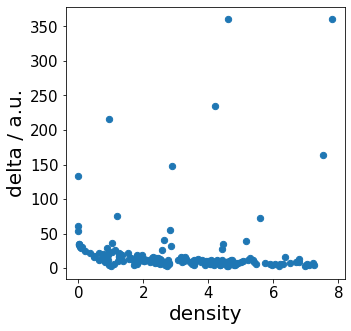

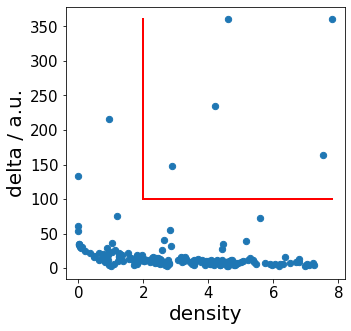

In [18]:
clu = Cluster(np.ascontiguousarray(X))
clu.assign(2, 100)
Y_pred = clu.membership

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

## DPA

In [19]:
dpa = DPA.DensityPeakAdvanced(Z=1.5)
dpa.fit(X)

Y_pred = dpa.halos_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.38217,0.049329,0.493976,0.152903,0.932584,2.0


# 3. Real dataset - hepatitis

In [20]:
X, Y_true = DataLoader(name='hepatitis').load()

## GIT

In [21]:
Y_pred = GIT(k=8, 
             target_ratio=[ 1., 1]).fit_predict(X)

Y_pred, Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.778643,0.232691,0.766234,0.122613,1.0,2.0


## HDBSCAN

In [22]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=2, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred = clusterer.labels_
Y_pred, Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.707275,0.050643,0.765517,0.015133,0.941558,3.0


## QuickshiftPP

In [23]:
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=15,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.70832,0.015719,0.785714,0.00279,1.0,2.0


## SpectACI

In [24]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=2, epsilon=500).fit_predict(X)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.71191,0.025588,0.792208,0.009504,1.0,2.0


## Spectral Clustering

In [25]:
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/opt/anaconda3/envs/cluster/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


,f1,ARI,ACC,NMI,cover_rate,classes
0,0.582205,-0.001887,0.538961,0.000378,1.0,2.0


## K-Means

In [26]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.704962,0.019064,0.74026,0.001427,1.0,2.0


## DPC

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.718769,0.041227,0.772727,0.007251,1.0,2.0


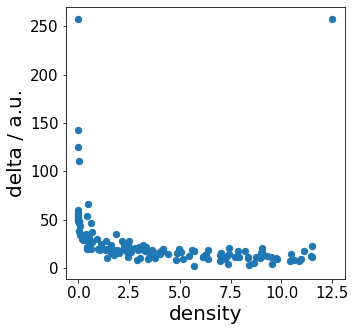

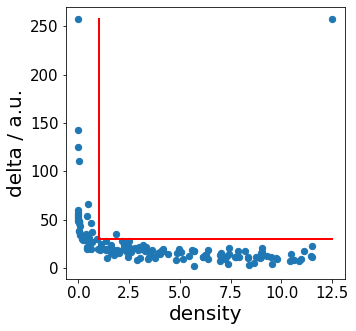

In [27]:
clu = Cluster(np.ascontiguousarray(X))
clu.assign(1, 30)
Y_pred = clu.membership

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

## DPA

In [28]:
dpa = DPA.DensityPeakAdvanced(Z=0.5)
dpa.fit(X)

Y_pred = dpa.halos_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.700358,0.0,0.792208,2.607092e-15,1.0,1.0


# 4. Real dataset - breast cancer

In [29]:
X, Y_true = DataLoader(name='breast_cancer').load()

## GIT

In [30]:
Y_pred = GIT(k=12,
             target_ratio=[ 1., 1]).fit_predict(X)

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.926274,0.729563,0.927944,0.653727,1.0,2.0


## HDBSCAN

In [31]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=10, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred = clusterer.labels_
Y_pred, Y_true = matchY(Y_pred, Y_true)
result = measures_calculator(Y_true, Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.784798,0.404075,0.816017,0.33865,0.811951,3.0


## QuickshiftPP

In [32]:
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=20,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.776827,0.405152,0.72935,0.336407,1.0,3.0


## SpectACI

In [33]:
Y_pred = Spectacl(affinity="radius_neighbors", n_clusters=2, epsilon=90).fit_predict(X)
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,NMI,cover_rate,classes
0,0.916926,0.694721,0.917399,0.573257,1.0,2.0


## Spectral Clustering

In [ ]:
clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/opt/anaconda3/envs/cluster/lib/python3.7/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


## K-Means

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

## DPC

In [ ]:
clu = Cluster(np.ascontiguousarray(X))
clu.assign(1, 200)
Y_pred = clu.membership

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

## DPA

In [ ]:
dpa = DPA.DensityPeakAdvanced(Z=0.1)
dpa.fit(X)

Y_pred = dpa.halos_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result